In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

try:
  # Load training dataset
  test_df = pd.read_csv('./mitbih_test.csv',header = None)
  
  # Load testing dataset
  train_df = pd.read_csv('./mitbih_train.csv',header = None)

  print('Success: Data loaded into dataframe.')

except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [22]:
# Setting Dictionary to define the type of Heartbeat for both datasets
MIT_Outcome = {0. : 'Normal Beat',
               1. : 'Supraventricular premature beat',
               2. : 'Premature ventricular contraction',
               3. : 'Fusion of ventricular and normal beat'}

In [23]:
# Rename last column to "Class"

train_df.rename(columns={187:"Class"}, inplace=True)
test_df.rename(columns={187:"Class"}, inplace=True)

In [24]:
# print value counts

train_df['Class'].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Class, dtype: int64

In [25]:
# only use 75 columns

max_features = 75

In [26]:
# TRAINING DATA _ get rows where columns max_features - 187 are zero values
rows = train_df[train_df.iloc[:,max_features:187].sum(axis=1) == 0].index

# remove them... THEY ARE NOISY ROWS
train_df.drop(rows, inplace=True)

train_df.dropna(inplace=True)
train_df.drop_duplicates(inplace=True)

In [27]:
# TESTNG DATA _ get rows where columns max_features - 187 are zero values
rows = test_df[test_df.iloc[:,max_features:187].sum(axis=1) == 0].index

test_df.drop(rows, inplace=True)

test_df.dropna(inplace=True)
test_df.drop_duplicates(inplace=True)

In [28]:
train_df['Class'].value_counts()

0.0    67715
4.0     6337
2.0     5231
1.0     1794
3.0      430
Name: Class, dtype: int64

In [29]:
original_train_df = train_df.copy()
original_test_df = test_df.copy()

In [30]:
# print columns count

print('training data column counts:')
print(len(train_df.columns))

training data column counts:
188


In [31]:
# Remove class 4

def remove_class(class_number):
    filtering_train_df = train_df['Class'] != class_number
    filtering_test_df = test_df['Class'] != class_number
    train_df.where(filtering_train_df, inplace=True)
    test_df.where(filtering_test_df, inplace=True)

remove_class(4)

In [32]:
# Remove na and duplicates

train_df = train_df.dropna().drop_duplicates()
test_df = test_df.dropna().drop_duplicates()

In [33]:
# print vlue counts for 'Class' column
print('training data value counts:')
print(train_df['Class'].value_counts())

print('testing data value counts:')
print(test_df['Class'].value_counts())

training data value counts:
0.0    67715
2.0     5231
1.0     1794
3.0      430
Name: Class, dtype: int64
testing data value counts:
0.0    16886
2.0     1290
1.0      454
3.0      106
Name: Class, dtype: int64


<Figure size 360x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fef283d44c0>,
 [Text(-1.0470394316349885, 0.3372068039074544, 'normal beat'),
  Text(1.0112222148859586, -0.432931440439634, 'Ventricular ectopic beats'),
  Text(1.0932402513752484, -0.1217610478477577, 'Supraventricular ectopic beats'),
  Text(1.0998223755846714, -0.019767199176671624, 'Fusion Beats')],
 [Text(-0.5711124172554483, 0.18393098394952054, '90.1%'),
  Text(0.5515757535741591, -0.23614442205798214, '7.0%'),
  Text(0.596312864386499, -0.06641511700786783, '2.4%'),
  Text(0.5999031139552752, -0.010782108641820885, '0.6%')])

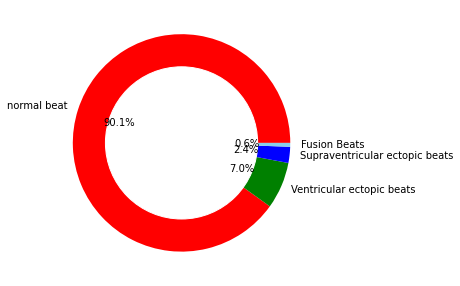

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(train_df['Class'].value_counts(), labels=['normal beat','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [35]:
from sklearn.utils import resample

df_1=train_df[train_df['Class']==1]
df_2=train_df[train_df['Class']==2]
df_3=train_df[train_df['Class']==3]
df_0=(train_df[train_df['Class']==0])

df_0_resample = resample(df_0,replace=False,n_samples=10000,random_state=123)

train_df = pd.concat([df_0_resample,df_1,df_2,df_3]).dropna().drop_duplicates()
test_df = test_df.dropna().drop_duplicates()

<Figure size 360x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fef2841cd30>,
 [Text(-0.24973360581177048, 1.0712764004346644, 'normal beat'),
  Text(-0.1874592556969693, -1.0839091416966362, 'Ventricular ectopic beats'),
  Text(0.9768736138136028, -0.5056856164008939, 'Supraventricular ectopic beats'),
  Text(1.0967073646730783, -0.08504678872145455, 'Fusion Beats')],
 [Text(-0.1362183304427839, 0.5843325820552714, '57.3%'),
  Text(-0.10225050310743779, -0.5912231681981651, '30.0%'),
  Text(0.5328401529892378, -0.2758285180368512, '10.3%'),
  Text(0.5982040170944063, -0.046389157484429754, '2.5%')])

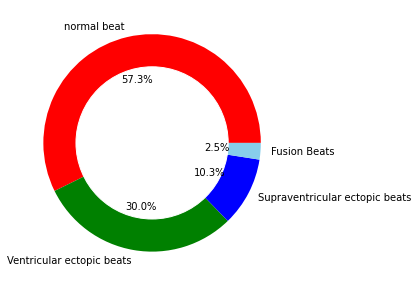

In [36]:
plt.figure(figsize=(5,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(train_df['Class'].value_counts(), labels=['normal beat','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [38]:
from sklearn.metrics import plot_confusion_matrix
import joblib

best_svc = None
best_svc_score = 0.0
best_i = 0
best_gamma = 0.0
best_kernel = ''
best_regularization = 0.0
best_normal_sample = 0.0
best_max_features = 187
svc = None

# highest f1 score for abnormal classes ( 1 - 3 )
best_abn_score = 0

In [39]:
# SHOW ALL OUTPUT - Pandas and Jupyter
pd.set_option('display.max_rows', None)

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [40]:
# Keep trying candidate values until the best one is found, save the best one as a joblib file
# I made this to stop worrying about time, I can let it try all the day then wake up and find the best model ready and saved :3
# For Overfitting, I think it wont happen much, because we depend on a score that is obtained from an external dataset
from sklearn.metrics import f1_score

class_weights_list = [
    {0: 2.2, 1: 10, 2: 3.8, 3: 8},
    # add other weights to try here
]

# C is the regularization parameter, I got better results using higher C and up, but this might be dangerous and not recommended
# I believe this wont produce overfitting, C is not very large?
for C in [
        25,
    # 15,
    # 1
]:
        for class_weights in class_weights_list:
            test_df = test_df.dropna().drop_duplicates()

            print("training now..")

            print(class_weights)

            svc = SVC(kernel='rbf', cache_size=500, probability=True,
                        random_state=96, class_weight=class_weights, C=C)
            
            %time svc.fit(train_df.iloc[:, :max_features], train_df['Class'])

            abnormal_test_df = test_df[test_df['Class'] != 0]

            abnormal_y_true = abnormal_test_df['Class']
            
            abnormal_y_pred = svc.predict(
                abnormal_test_df.iloc[:, :max_features])

            print("obtaining f1 score....")
            
            abn_score = f1_score(
                abnormal_y_true, abnormal_y_pred, average='macro')

            print('Abn Score:', abn_score)

            best_svc = svc
            best_normal_sample = normal_sample
            best_abn_score = abn_score
            best_max_features = max_features

            all_score = svc.score(
                test_df.iloc[:, :max_features], test_df['Class'])

            # convert class weights to str
            class_weights_str = str(class_weights)

            # write model to file
            with open(f"./new_models/model_C{C}_abnscore{best_abn_score}_score{all_score}_{best_svc_score}_normalsamples_{best_normal_sample}_maxfeatures_{best_max_features}_class_weights_{class_weights_str}.joblib", "wb") as output_file:
                joblib.dump(best_svc, output_file)


normal sample: None
max features: 75
0.0    67715
4.0     6337
2.0     5231
1.0     1794
3.0      430
Name: Class, dtype: int64
training now..
{0: 2.2, 1: 20, 2: 3.8, 3: 8}
CPU times: user 9min 41s, sys: 260 ms, total: 9min 41s
Wall time: 9min 42s


SVC(C=25, cache_size=500, class_weight={0: 2.2, 1: 20, 2: 3.8, 3: 8},
    probability=True, random_state=96)

obtaining f1 score....
Abn Score: 0.7179242127902553
normal sample: None
max features: 75
0.0    67715
4.0     6337
2.0     5231
1.0     1794
3.0      430
Name: Class, dtype: int64
training now..
{0: 2.2, 1: 32, 2: 4, 3: 14}
CPU times: user 10min 48s, sys: 200 ms, total: 10min 48s
Wall time: 10min 49s


SVC(C=25, cache_size=500, class_weight={0: 2.2, 1: 32, 2: 4, 3: 14},
    probability=True, random_state=96)

obtaining f1 score....
Abn Score: 0.7192750190323599
